<a href="https://colab.research.google.com/github/gabi-pacheco/bootcamp_keyword_extraction/blob/main/Keywords_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Open the Google Sheets document by URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1NsBjGQzv85KH1SIJwvLiILg_pQIPrrlu6NJupV5oknQ/edit?usp=sharing'
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first sheet
worksheet = spreadsheet.get_worksheet(0)

# Get all values from the sheet as a list of lists
rows = worksheet.get_all_values()

# Convert the list of lists to a DataFrame
keywords = pd.DataFrame(rows[1:], columns=rows[0])

# Display the DataFrame
print(keywords)

                    Unit                           Modules Challenge  \
0    2.Business Analysis            Google Sheet & Finance     2.1.2   
1    2.Business Analysis            Google Sheet & Finance     2.1.3   
2    2.Business Analysis            Google Sheet & Finance     2.1.4   
3    2.Business Analysis  Google Sheets, Stock & Logistics     2.2.2   
4    2.Business Analysis  Google Sheets, Stock & Logistics     2.2.3   
..                   ...                               ...       ...   
195                8.CSR           Role and Impact of Data     8.1.7   
196                8.CSR           Role and Impact of Data     8.1.8   
197                8.CSR           Role and Impact of Data     8.1.9   
198                8.CSR           Role and Impact of Data    8.1.10   
199                8.CSR           Role and Impact of Data    8.1.11   

                                        Challenge_text  \
0    kitt.lewagon.com\nFinance at Greenweez · Busin...   
1    kitt.lewagon.c

In [ ]:
#keywords = pd.read_csv('/content/Bootcamp_challenges_keywords - Sheet1.tsv', sep='\t', header=0)

In [ ]:
keywords.head()

,Unit,Modules,Challenge,Challenge_text,Keywords,Relevant,Less_relevant,Functions,Department,Metrics,Tools
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join","Data, Team, Create, Analysis, Challenge, Diffe...","SUM, AVERAGE, MATCH, INDEX, IF, COUNT, MIN, IM...","logistics, shipping, Ads","Revenue, Profit, Margin, Cost, margin percenta...","Google Sheets, Git, Pivot table"
1,2.Business Analysis,Google Sheet & Finance,2.1.3,kitt.lewagon.com\nHigh Level Performance at Gr...,"kittlewagoncom, high, level, performance, gree...","KPIs, finance, sheets","Data, Team, Create, Analysis, Challenge","SUM, IF, COUNT, MIN, IMPORTRANGE, SELECT, FROM","marketing, sales, shipping, Traffic","Revenue, Margin, Conversion Rate","Google Sheets, Pivot table"
2,2.Business Analysis,Google Sheet & Finance,2.1.4,kitt.lewagon.com\nPerformance Monitoring and H...,"kittlewagoncom, performance, monitoring, busin...","KPIs, finance, models","Data, Analysis, Different","SUM, MATCH, IF, MIN, FROM",,"Revenue, Margin, MRR, ARR",Pivot table
3,2.Business Analysis,"Google Sheets, Stock & Logistics",2.2.2,kitt.lewagon.com\nInventory Management · Busin...,"kittlewagoncom, inventory, management, busines...","sheets, chart","Data, Team, Create, Analysis, Challenge, Conte...","SUM, AVERAGE, MATCH, IF, MIN, FILTER, SELECT, ...","sales, inventory",,"Google Sheets, Pivot table"
4,2.Business Analysis,"Google Sheets, Stock & Logistics",2.2.3,kitt.lewagon.com\nQuality Product · Business A...,"kittlewagoncom, quality, product, business, an...","KPIs, sheets, chart","Data, Team, Create, Analysis, Challenge","SUM, IF, IFS, MIN, FROM, UPDATE","sales, shipping",Revenue,"Google Sheets, Pivot table"


In [ ]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unit            200 non-null    object
 1   Modules         200 non-null    object
 2   Challenge       200 non-null    object
 3   Challenge_text  200 non-null    object
 4   Keywords        200 non-null    object
 5   Relevant        200 non-null    object
 6   Less_relevant   200 non-null    object
 7   Functions       200 non-null    object
 8   Department      200 non-null    object
 9   Metrics         200 non-null    object
 10  Tools           200 non-null    object
dtypes: object(11)
memory usage: 17.3+ KB


In [ ]:
relevant_formulas = [
    # SQL Functions and Commands
    "SUM", "AVG", "COUNT", "COUNTA", "COUNTIF", "COUNTIFS", "MIN", "MAX", "CONCAT", "SUBSTRING", "LOWER", "UPPER", "TRIM", "REPLACE",
    "NOW", "CURDATE", "DATEADD", "DATEDIFF", "YEAR", "MONTH", "DAY", "DATE_FORMAT",
    "ROUND", "CEIL", "FLOOR", "ABS", "CASE WHEN", "IF", "INNER JOIN", "LEFT JOIN", "RIGHT JOIN", "FULL OUTER JOIN",
    "WITH", "ROW_NUMBER", "RANK", "DENSE_RANK", "LEAD", "LAG", "OVER", "SELECT", "FROM", "WHERE", "JOIN", "GROUP BY",
    "ORDER BY", "HAVING", "DISTINCT", "INSERT", "UPDATE", "DELETE", "CREATE TABLE", "ALTER TABLE", "DROP TABLE", "UNION", "UNION ALL",
    "LIMIT", "OFFSET",

    # Python Libraries and Functions
    # Pandas
    "pd.read_csv", "pd.read_excel", "head", "tail", "describe", "groupby", "merge", "concat", "pivot_table", "apply", "loc", "iloc",
    "mean", "value_counts", "shape", "info", "dataframe", "append", ".isin", ".isocalendar", "resample", "interpolate", "agg", "fillna",
    "drop", "reset_index",
    # NumPy
    "np.array", "np.mean", "np.median", "np.std", "np.sum", "np.linspace", "np.arange",
    # Matplotlib/Seaborn
    "plt.plot", "plt.scatter", "plt.bar", "sns.heatmap", "sns.boxplot", "sns.pairplot",
    # Scikit-learn
    "train_test_split", "LinearRegression", "LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier",
    "StandardScaler", "PCA",
    # Others
    "datetime", "json", "re", "requests", "BeautifulSoup", "OHE", "xtrain", "xtest", "def", "print", "key", "return",

    # Google Sheets Formulas and Functions
    "SUM", "AVERAGE", "VLOOKUP", "HLOOKUP", "MATCH", "INDEX", "COUNT", "COUNTA", "COUNTIF", "COUNTIFS", "MIN", "MAX", "QUERY",
    "IMPORTRANGE", "UNIQUE", "FILTER", "SORT", "SPARKLINE", "ARRAYFORMULA", "TODAY", "NOW", "DATE", "YEAR", "MONTH", "DAY",
    "DATEDIF", "EDATE", "IF", "AND", "OR", "NOT", "IFERROR",

    # Additional Data Analysis Terms and Methods
    "p-value"
]


In [ ]:
from collections import Counter

In [ ]:
# Function to count relevant keywords in a text
def count_code(text, code_list):
    # Convert the text to lower case for case-insensitive matching
    words = [word.strip().lower() for word in text.split(',')]
    # Convert code list to lower case for case-insensitive matching
    code_list_lower = [c.lower() for c in code_list]
    # Count the occurrences of each relevant keyword
    codewords_counts = Counter(word for word in words if word in code_list_lower)
    return codewords_counts

# Process each row in the 'Keywords' column and store the counts in a list of dictionaries
data = []
for idx, row in keywords.iterrows():
    codewords_counts = count_code(row['Keywords'], relevant_formulas)
    for code, count in codewords_counts.items():
        data.append({
            'Unit': row['Unit'],
            'Module': row['Modules'],
            'Challenge': row['Challenge'],
            'relevant_code': code,
            'nb_code_appearances': count
        })

In [ ]:
# Function to count relevant keywords in a text
def count_code (text, code):
    # Split the text into individual words
    words = text.split(', ')
    # Count the occurrences of each relevant keyword
    codewords_counts = Counter(word for word in words if word in code)
    return codewords_counts

# Process each row in the 'keywords' column and store the counts in a list of dictionaries
data = []
for idx, row in keywords.iterrows():
    codewords_counts = count_code(row['Keywords'], relevant_formulas)
    for code, count in codewords_counts.items():
        data.append({
            'Unit': row['Unit'],
            'Module': row['Modules'],
            'Challenge': row['Challenge'],
            'relevant_code': code,
            'nb_code_appearances': count
        })

In [ ]:
# Create a DataFrame from the list of dictionaries
df_code = pd.DataFrame(data)
df_code.head(50)

,Unit,Module,Challenge,relevant_code,nb_code_appearances
0,2.Business Analysis,Google Sheet & Finance,2.1.2,with,25
1,2.Business Analysis,Google Sheet & Finance,2.1.2,date,6
2,2.Business Analysis,Google Sheet & Finance,2.1.2,today,2
3,2.Business Analysis,Google Sheet & Finance,2.1.2,importrange,10
4,2.Business Analysis,Google Sheet & Finance,2.1.2,datetime,2
5,2.Business Analysis,Google Sheet & Finance,2.1.2,year,4
6,2.Business Analysis,Google Sheet & Finance,2.1.2,month,4
7,2.Business Analysis,Google Sheet & Finance,2.1.2,day,12
8,2.Business Analysis,Google Sheet & Finance,2.1.2,filter,6
9,2.Business Analysis,Google Sheet & Finance,2.1.2,limit,4


In [ ]:
df_code.tail(20)

,Unit,Module,Challenge,relevant_code,nb_code_appearances
843,7.Machine Learning,Python for AI - Clustering,7.4.2,with,12
844,7.Machine Learning,Python for AI - Clustering,7.4.2,dataframe,2
845,7.Machine Learning,Python for AI - Clustering,7.4.2,print,5
846,8.CSR,Role and Impact of Data,8.1.1,with,12
847,8.CSR,Role and Impact of Data,8.1.1,average,1
848,8.CSR,Role and Impact of Data,8.1.1,index,2
849,8.CSR,Role and Impact of Data,8.1.1,date,1
850,8.CSR,Role and Impact of Data,8.1.1,min,1
851,8.CSR,Role and Impact of Data,8.1.1,dataframe,4
852,8.CSR,Role and Impact of Data,8.1.1,merge,2


In [ ]:
unit_code_counts = df_code.groupby(['Unit', 'relevant_code']).agg({'nb_code_appearances': 'sum'}).reset_index()
unit_code_counts.head(25)

,Unit,relevant_code,nb_code_appearances
0,2.Business Analysis,apply,4
1,2.Business Analysis,average,20
2,2.Business Analysis,count,2
3,2.Business Analysis,date,46
4,2.Business Analysis,datedif,2
5,2.Business Analysis,datetime,2
6,2.Business Analysis,day,22
7,2.Business Analysis,filter,28
8,2.Business Analysis,iferror,2
9,2.Business Analysis,importrange,12


from matplotlib import pyplot as plt
_df_0['nb_code_appearances'].plot(kind='hist', bins=20, title='nb_code_appearances')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['nb_code_appearances'].plot(kind='line', figsize=(8, 4), title='nb_code_appearances')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# prompt: order df_code by unit asc and nb_code_appearances desc

unit_code_counts_sorted = unit_code_counts.sort_values(by=['Unit', 'nb_code_appearances'], ascending=[True, False])
unit_code_counts_sorted.head(50)

,Unit,relevant_code,nb_code_appearances
25,2.Business Analysis,with,195
3,2.Business Analysis,date,46
13,2.Business Analysis,key,34
7,2.Business Analysis,filter,28
6,2.Business Analysis,day,22
14,2.Business Analysis,lead,22
1,2.Business Analysis,average,20
19,2.Business Analysis,return,14
9,2.Business Analysis,importrange,12
20,2.Business Analysis,select,12


In [ ]:
# prompt: limit unit_code_counts_sorted to the top 3 relevant_code (3 highest nb_code_appearances) per unit

# Group by 'Unit' and sort by 'nb_code_appearances' in descending order
top_3_per_unit = unit_code_counts_sorted.groupby('Unit').head(3)

# Display the result
top_3_per_unit

,Unit,relevant_code,nb_code_appearances
25,2.Business Analysis,with,195
3,2.Business Analysis,date,46
13,2.Business Analysis,key,34
62,3.Data transformation,with,244
48,3.Data transformation,query,205
41,3.Data transformation,join,188
93,4.Data collection,with,178
81,4.Data collection,query,62
79,4.Data collection,merge,45
131,5.Dashboarding,with,155


# DATAFRAME keyword_df


In [ ]:
df = keywords.drop(columns=["Less_relevant", "Relevant", "Functions", "Metrics", "Tools", "Department"])
df.head()

,Unit,Modules,Challenge,Challenge_text,Keywords
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ..."
1,2.Business Analysis,Google Sheet & Finance,2.1.3,kitt.lewagon.com\nHigh Level Performance at Gr...,"kittlewagoncom, high, level, performance, gree..."
2,2.Business Analysis,Google Sheet & Finance,2.1.4,kitt.lewagon.com\nPerformance Monitoring and H...,"kittlewagoncom, performance, monitoring, busin..."
3,2.Business Analysis,"Google Sheets, Stock & Logistics",2.2.2,kitt.lewagon.com\nInventory Management · Busin...,"kittlewagoncom, inventory, management, busines..."
4,2.Business Analysis,"Google Sheets, Stock & Logistics",2.2.3,kitt.lewagon.com\nQuality Product · Business A...,"kittlewagoncom, quality, product, business, an..."


In [ ]:
from collections import Counter

Define relevant_keywords list


In [ ]:
relevant_keywords = ["Business analysis", "Data model", "Data sources", "Pivot Tables", "graphs", "KPIs",
                     "Data cleaning", "data transformation", "modeling", "Google Sheets",
                     "media acquisition", "online advertising", "finance",
                     "Data analysis", "git", "github", "google colab", "sheets", "zapier", "fivetran",
                     "census", "powerbi", "matplotlib", "gtm", "Dbt", "python", "data aggregation",
                     "data visualization", "SQL", "data pipeline", "chart", "ETL", "ELT", "web scrapping",
                     "API", "documentation", "data governance", "zaps", "models", "eda", "data modern stack",
                     "metric", "pivot table", "Data enrichment", "Data import", "Data modeling",
                     "Data extraction", "crud", "BigQuery", "Machine Learning", "Linear Regression",
                     "Hubspot", "project", "Looker Studio", "DAX", "dashboard", "Plotly", "Jupyter notebook",
                     "prediction", "classification", "chi-test", "standard scaler", "features", "measure",
                     "dimension", "metric", "clustering", "classification", "pandas", "regression", "kmeans",
                     "seaborn", "OHE", "xtrain", "xtest", "random forest", "decision trees", "pycaret",
                     "onehotencoder", "normalized", "categorical", "numerical", "sklearn", "statistical testing",
                     "subquery", "window functions", "join", "pipeline", "schema", "accuracy", "repository",
                     "NPS", "parcel tracking", "funnel acquisition", "variables", "loop", "dictionary",
                     "list", "data type", "arguments", "function", "def", "print", "key", "return", "json", "loc", "iloc",
                     "mean", "groupby", "value_counts", "datetime", "SUM", "AVERAGE", "VLOOKUP", "HLOOKUP",
                     "MATCH", "INDEX", "COUNT", "COUNTA", "COUNTIF", "COUNTIFS", "MIN", "MAX", "QUERY", "IMPORTRANGE",
                     "UNIQUE", "FILTER", "SORT", "SPARKLINE", "ARRAYFORMULA", "SELECT", "FROM", "WHERE", "JOIN", "INNER JOIN", "LEFT JOIN",
                     "RIGHT JOIN", "FULL JOIN", "GROUP BY", "ORDER BY", "HAVING", "DISTINCT", "INSERT", "UPDATE", "DELETE",
                     "CREATE TABLE", "ALTER TABLE", "DROP TABLE", "UNION", "UNION ALL", "LIMIT", "OFFSET", "iterate", "head", "tail",
                     "shape", "info", "dataframe", "append", "collections", "subplots", ".isin", ".isocalendar", "resample", "interpolate",
                     "agg", "fillna", "drop", "reset_index", "p-value", "hypothesis", "A/B Testing", "target", "train_test_split"]

Define count_keywords

In [ ]:
# Function to count relevant keywords in a text
def count_keywords(text, keywords):
    # Split the text into individual words
    words = text.split(', ')
    # Count the occurrences of each relevant keyword
    keyword_counts = Counter(word for word in words if word in keywords)
    return keyword_counts

Process Each Row and Store Counts

In [ ]:
# Process each row in the 'keywords' column and store the counts in a list of dictionaries
data = []
for idx, row in df.iterrows():
    keyword_counts = count_keywords(row['Keywords'], relevant_keywords)
    for keyword, count in keyword_counts.items():
        data.append({
            'Unit': row['Unit'],
            'Module': row['Modules'],
            'Challenge': row['Challenge'],
            'relevant_keywords': keyword,
            'nb_keyword_appearances': count
        })

In [ ]:
keyword_counts

Counter()

In [ ]:
# Create a DataFrame from the list of dictionaries
df_keywords = pd.DataFrame(data)
df_keywords.head(50)

,Unit,Module,Challenge,relevant_keywords,nb_keyword_appearances
0,2.Business Analysis,Google Sheet & Finance,2.1.2,finance,17
1,2.Business Analysis,Google Sheet & Finance,2.1.2,sheets,6
2,2.Business Analysis,Google Sheet & Finance,2.1.2,dictionary,2
3,2.Business Analysis,Google Sheet & Finance,2.1.2,datetime,2
4,2.Business Analysis,Google Sheet & Finance,2.1.2,function,6
5,2.Business Analysis,Google Sheet & Finance,2.1.2,hypothesis,2
6,2.Business Analysis,Google Sheet & Finance,2.1.2,join,2
7,2.Business Analysis,Google Sheet & Finance,2.1.3,sheets,6
8,2.Business Analysis,Google Sheet & Finance,2.1.3,finance,2
9,2.Business Analysis,Google Sheet & Finance,2.1.3,list,6


### Groupby words per unit

Previously words were listed per challenge. Now, we aggregated them by unit.

In [ ]:
# Aggregate keyword counts per unit
unit_keyword_counts = df_keywords.groupby(['Unit', 'relevant_keywords']).agg({'nb_keyword_appearances': 'sum'}).reset_index()
unit_keyword_counts.head(50)

,Unit,relevant_keywords,nb_keyword_appearances
0,2.Business Analysis,chart,37
1,2.Business Analysis,datetime,2
2,2.Business Analysis,dictionary,2
3,2.Business Analysis,finance,23
4,2.Business Analysis,function,16
5,2.Business Analysis,graphs,30
6,2.Business Analysis,hypothesis,2
7,2.Business Analysis,join,2
8,2.Business Analysis,key,34
9,2.Business Analysis,list,12


In [ ]:
# Identify the most recurring keyword per unit
top_keywords_per_unit = unit_keyword_counts.loc[unit_keyword_counts.groupby('Unit')['nb_keyword_appearances'].idxmax()]
top_keywords_per_unit.head(50)

,Unit,relevant_keywords,nb_keyword_appearances
19,2.Business Analysis,sheets,39
29,3.Data transformation,join,188
49,4.Data collection,github,65
75,5.Dashboarding,dashboard,67
107,6.Python,dataframe,46
148,7.Machine Learning,features,65
183,8.CSR,features,5


## Export df_keywords

In [ ]:
from google.colab import auth
from google.auth import default

try:
  import gspread
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install gspread
  import gspread

from gspread_dataframe import set_with_dataframe

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
# Open an existing Google Sheet by URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1SDwZpRZvLleUXedaUNeExeIgOdkbJj_10N0ByURhLBo/edit?usp=sharing'
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first sheet or create a new one
worksheet = spreadsheet.get_worksheet(0)

# Create a DataFrame from the keywords_metrics DataFrame
df = df_keywords

# Write the DataFrame to the worksheet
set_with_dataframe(worksheet, df)

KeyboardInterrupt: 

# TOOLS

## Prep

In [ ]:
df_tools = keywords.drop(columns=["Less_relevant", "Relevant", "Functions", "Metrics", "Department"])
df_tools.head()

,Unit,Modules,Challenge,Challenge_text,Keywords,Tools
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","Google Sheets, Git, Pivot table"
1,2.Business Analysis,Google Sheet & Finance,2.1.3,kitt.lewagon.com\nHigh Level Performance at Gr...,"kittlewagoncom, high, level, performance, gree...","Google Sheets, Pivot table"
2,2.Business Analysis,Google Sheet & Finance,2.1.4,kitt.lewagon.com\nPerformance Monitoring and H...,"kittlewagoncom, performance, monitoring, busin...",Pivot table
3,2.Business Analysis,"Google Sheets, Stock & Logistics",2.2.2,kitt.lewagon.com\nInventory Management · Busin...,"kittlewagoncom, inventory, management, busines...","Google Sheets, Pivot table"
4,2.Business Analysis,"Google Sheets, Stock & Logistics",2.2.3,kitt.lewagon.com\nQuality Product · Business A...,"kittlewagoncom, quality, product, business, an...","Google Sheets, Pivot table"


In [ ]:
type(df_tools)

pandas.core.frame.DataFrame

Index(['Unit', 'Modules', 'Challenge', 'Challenge_text', 'Keywords', 'Tools'], dtype='object')


In [ ]:
# Define the data analytics tools list
data_analytics_tools = [
    "Python", "R", "SQL", "Google Sheets", "Excel", "Pivot tables", "Tableau", "Power BI", "Looker", "Qlik",
    "SAS", "Apache Hadoop", "Apache Spark", "Matplotlib", "Seaborn", "Plotly",
    "Pandas", "Numpy", "Scikit-learn", "TensorFlow", "Keras", "PyTorch",
    "Alteryx", "Domo", "Looker", "Microsoft Azure", "AWS",
    "Google Cloud Platform", "IBM Watson", "BigQuery", "DataRobot",
    "Snowflake", "Databricks", "RapidMiner", "KNIME", "Dataiku", "Splunk",
    "Elasticsearch", "Jupyter Notebook", "Google Colab", "Mathematica",
    "Stata", "SPSS", "H2O.ai", "TIBCO Spotfire", "MicroStrategy", "SAP Analytics Cloud",
    "Redash", "Superset", "Metabase", "Mode Analytics", "Dundas BI",
    "Sisense", "Oracle Analytics", "Cognos Analytics", "Yellowfin",
    "GoodData", "ThoughtSpot", "Periscope Data", "Pentaho", "Talend", "Fivetran",
    "Airflow", "Dbt", "SciPy", "Git", "Github", "Bitbucket", "GitLab", "Zapier",
    "Beautiful Soup", "Scrapy", "Requests", "Machine Learning", "GTM", "Google Analytics"

]

# Convert each tool name to lowercase
data_analytics_tools_lower = [tool.lower() for tool in data_analytics_tools]

# Print the refined list
print(data_analytics_tools_lower)

['python', 'r', 'sql', 'google sheets', 'excel', 'pivot tables', 'tableau', 'power bi', 'looker', 'qlik', 'sas', 'apache hadoop', 'apache spark', 'matplotlib', 'seaborn', 'plotly', 'pandas', 'numpy', 'scikit-learn', 'tensorflow', 'keras', 'pytorch', 'alteryx', 'domo', 'looker', 'microsoft azure', 'aws', 'google cloud platform', 'ibm watson', 'bigquery', 'datarobot', 'snowflake', 'databricks', 'rapidminer', 'knime', 'dataiku', 'splunk', 'elasticsearch', 'jupyter notebook', 'google colab', 'mathematica', 'stata', 'spss', 'h2o.ai', 'tibco spotfire', 'microstrategy', 'sap analytics cloud', 'redash', 'superset', 'metabase', 'mode analytics', 'dundas bi', 'sisense', 'oracle analytics', 'cognos analytics', 'yellowfin', 'gooddata', 'thoughtspot', 'periscope data', 'pentaho', 'talend', 'fivetran', 'airflow', 'dbt', 'scipy', 'git', 'github', 'bitbucket', 'gitlab', 'zapier', 'beautiful soup', 'scrapy', 'requests', 'machine learning', 'gtm', 'google analytics']


In [ ]:
from collections import Counter

def count_tools(text, tools):
    # Split the text into individual words
    words = text.split(', ')
    #print(f"Words: {words}")  # Debugging line to check the split words
    # Count the occurrences of each relevant tool
    tool_counts = Counter(word for word in words if word in tools)
    #print(f"Tool Counts: {tool_counts}")  # Debugging line to check counts
    return tool_counts


In [ ]:
print(keywords['Tools'].head())

0    R, Git
1         R
2         R
3         R
4         R
Name: Tools, dtype: object


In [ ]:
# Process each row in the 'Tools' column and store the counts in a list of dictionaries
data_tools = []
for idx, row in keywords.iterrows():
    tool_counts = count_tools(row['Tools'], data_analytics_tools)
    for tool, count in tool_counts.items():
        data_tools.append({
            'Unit': row['Unit'],
            'Module': row['Modules'],
            'Challenge': row['Challenge'],
            'relevant_tool': tool,
            'nb_tool_appearances': count
        })

# Create a DataFrame from the list of dictionaries
df_tools_new = pd.DataFrame(data_tools)
df_tools_new.head(20)

,Unit,Module,Challenge,relevant_tool,nb_tool_appearances
0,2.Business Analysis,Google Sheet & Finance,2.1.2,Google Sheets,1
1,2.Business Analysis,Google Sheet & Finance,2.1.2,Git,1
2,2.Business Analysis,Google Sheet & Finance,2.1.3,Google Sheets,1
3,2.Business Analysis,"Google Sheets, Stock & Logistics",2.2.2,Google Sheets,1
4,2.Business Analysis,"Google Sheets, Stock & Logistics",2.2.3,Google Sheets,1
5,2.Business Analysis,"Google Sheets, Stock & Logistics",2.2.4,Google Sheets,1
6,2.Business Analysis,"Google Sheet, Product & Growth",2.3.1,Google Sheets,1
7,2.Business Analysis,"Google Sheet, Product & Growth",2.3.1,Google Analytics,1
8,2.Business Analysis,"Google Sheet, Product & Growth",2.3.2,Google Sheets,1
9,2.Business Analysis,"Google Sheets, CRM & Customers",2.4.1,Google Sheets,1


## Export

In [ ]:
from google.colab import auth
from google.auth import default

try:
  import gspread
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install gspread
  import gspread

from gspread_dataframe import set_with_dataframe

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
# Open an existing Google Sheet by URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1Bw22wMEKq-AQWetkrUzPIxkNwVyvdEu0xq_1Bu3AZJg/edit?usp=sharing'
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first sheet or create a new one
worksheet = spreadsheet.get_worksheet(0)

# Create a DataFrame from the keywords_metrics DataFrame
df = df_tools_new

# Write the DataFrame to the worksheet
set_with_dataframe(worksheet, df)



---



# FORMER CODE

In [ ]:
# Function to split and expand the 'Relevant' column
def split_and_expand_relevant(keywords):
    expanded_rows = []
    for _, row in keywords.iterrows():
        relevant_values = row['Relevant'].split(',') if pd.notna(row['Relevant']) else [None]
        for value in relevant_values:
            new_row = row.copy()
            new_row['Relevant'] = value.strip() if value else None
            expanded_rows.append(new_row)
    expanded_keywords = pd.DataFrame(expanded_rows)
    return expanded_keywords

# Expand the 'Relevant' column
keywords_relevant = split_and_expand_relevant(keywords)

# Ensure keywords_relevant is a DataFrame
if isinstance(keywords_relevant, pd.DataFrame):
    # Save the expanded DataFrame to a new CSV file
    keywords_relevant.to_csv('keywords_relevant.csv', index=False)
    print("CSV file saved successfully.")
else:
    print("Error: keywords_relevant is not a DataFrame")

# Display the first few rows of the expanded DataFrame to confirm
print(keywords_relevant.head())



CSV file saved successfully.
                  Unit                 Modules Challenge  \
0  2.Business Analysis  Google Sheet & Finance     2.1.2   
0  2.Business Analysis  Google Sheet & Finance     2.1.2   
0  2.Business Analysis  Google Sheet & Finance     2.1.2   
0  2.Business Analysis  Google Sheet & Finance     2.1.2   
1  2.Business Analysis  Google Sheet & Finance     2.1.3   

                                      Challenge_text  \
0  kitt.lewagon.com\nFinance at Greenweez · Busin...   
0  kitt.lewagon.com\nFinance at Greenweez · Busin...   
0  kitt.lewagon.com\nFinance at Greenweez · Busin...   
0  kitt.lewagon.com\nFinance at Greenweez · Busin...   
1  kitt.lewagon.com\nHigh Level Performance at Gr...   

                                            Keywords Relevant  \
0  kittlewagoncom, finance, greenweez, business, ...     KPIs   
0  kittlewagoncom, finance, greenweez, business, ...  finance   
0  kittlewagoncom, finance, greenweez, business, ...   sheets   
0  kittlewago

In [ ]:
keywords_relevant.shape

(749, 8)

In [ ]:
# Function to clean and filter caps-locked values
def clean_caps_values(cell):
    values = cell.split(',')
    caps_values = [value.strip() for value in values if value.isupper()]
    return ', '.join(caps_values)

# Function to filter and process the DataFrame
def process_functions_column(df):
    for index, row in df.iterrows():
        challenge = str(row['Challenge'])
        if challenge.startswith(('1', '2', '3', '4', '5')):
            if pd.notnull(row['Functions']):
                df.at[index, 'Functions'] = clean_caps_values(row['Functions'])
    return df

# Assume `keywords_relevant` is your DataFrame
# Process the DataFrame
processed_keywords_relevant = process_functions_column(keywords_relevant)

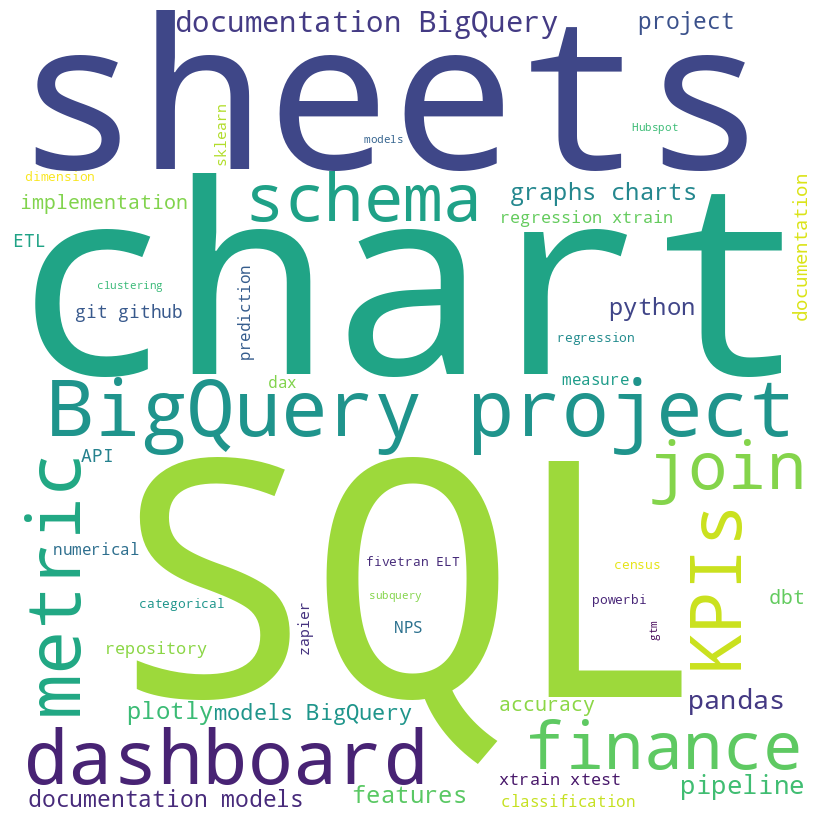

In [ ]:
# prompt: create a word cloud with the values in column relevant

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all relevant words into a single string
text = " ".join(word for word in keywords_relevant['Relevant'].dropna())

# Create the word cloud object
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)

# Display the generated image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [ ]:
def split_and_expand(keywords, columns):
    expanded_rows = []
    for _, row in keywords.iterrows():
        values_lists = {col: row[col].split(',') if pd.notna(row[col]) else [None] for col in columns}
        max_len = max(len(values) for values in values_lists.values())
        for i in range(max_len):
            new_row = row.copy()
            for col in columns:
                new_row[col] = values_lists[col][i] if i < len(values_lists[col]) else None
            expanded_rows.append(new_row)
    expanded_keywords = pd.DataFrame(expanded_rows)
    return expanded_keywords


# Expand the DataFrame
keywords_metrics = split_and_expand(keywords, keywords[['Metrics']])

# Display the first few rows of the expanded DataFrame
keywords_metrics.head()

,Unit,Modules,Challenge,Challenge_text,Keywords,Relevant,Functions,Department,Metrics,Tools
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join","SUM, AVERAGE, MATCH, INDEX, IF, COUNT, MIN, IM...","logistics, shipping, Ads",Revenue,"Google Sheets, Pivot Tables, Git"
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join","SUM, AVERAGE, MATCH, INDEX, IF, COUNT, MIN, IM...","logistics, shipping, Ads",Profit,"Google Sheets, Pivot Tables, Git"
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join","SUM, AVERAGE, MATCH, INDEX, IF, COUNT, MIN, IM...","logistics, shipping, Ads",Margin,"Google Sheets, Pivot Tables, Git"
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join","SUM, AVERAGE, MATCH, INDEX, IF, COUNT, MIN, IM...","logistics, shipping, Ads",Cost,"Google Sheets, Pivot Tables, Git"
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join","SUM, AVERAGE, MATCH, INDEX, IF, COUNT, MIN, IM...","logistics, shipping, Ads",margin percentage,"Google Sheets, Pivot Tables, Git"


In [ ]:
#do the same for Functions
keywords_functions = split_and_expand(keywords, keywords[['Functions']])

# Display the first few rows of the expanded DataFrame
keywords_functions.head()


,Unit,Modules,Challenge,Challenge_text,Keywords,Relevant,Functions,Department,Metrics,Tools
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join",SUM,"logistics, shipping, Ads","Revenue, Profit, Margin, Cost, margin percenta...","Google Sheets, Pivot Tables, Git"
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join",AVERAGE,"logistics, shipping, Ads","Revenue, Profit, Margin, Cost, margin percenta...","Google Sheets, Pivot Tables, Git"
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join",MATCH,"logistics, shipping, Ads","Revenue, Profit, Margin, Cost, margin percenta...","Google Sheets, Pivot Tables, Git"
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join",INDEX,"logistics, shipping, Ads","Revenue, Profit, Margin, Cost, margin percenta...","Google Sheets, Pivot Tables, Git"
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join",IF,"logistics, shipping, Ads","Revenue, Profit, Margin, Cost, margin percenta...","Google Sheets, Pivot Tables, Git"


In [ ]:
#do the same for Functions
keywords_tools = split_and_expand(keywords, keywords[['Tools']])

# Display the first few rows of the expanded DataFrame
keywords_tools.head()

,Unit,Modules,Challenge,Challenge_text,Keywords,Relevant,Functions,Department,Metrics,Tools
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join","SUM, AVERAGE, MATCH, INDEX, IF, COUNT, MIN, IM...","logistics, shipping, Ads","Revenue, Profit, Margin, Cost, margin percenta...",Google Sheets
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join","SUM, AVERAGE, MATCH, INDEX, IF, COUNT, MIN, IM...","logistics, shipping, Ads","Revenue, Profit, Margin, Cost, margin percenta...",Pivot Tables
0,2.Business Analysis,Google Sheet & Finance,2.1.2,kitt.lewagon.com\nFinance at Greenweez · Busin...,"kittlewagoncom, finance, greenweez, business, ...","KPIs, finance, sheets, join","SUM, AVERAGE, MATCH, INDEX, IF, COUNT, MIN, IM...","logistics, shipping, Ads","Revenue, Profit, Margin, Cost, margin percenta...",Git
1,2.Business Analysis,Google Sheet & Finance,2.1.3,kitt.lewagon.com\nHigh Level Performance at Gr...,"kittlewagoncom, high, level, performance, gree...","KPIs, finance, sheets","SUM, IF, COUNT, MIN, IMPORTRANGE, SELECT, FROM","marketing, sales, shipping, Traffic","Revenue, Margin, Conversion Rate",Google Sheets
2,2.Business Analysis,Google Sheet & Finance,2.1.4,kitt.lewagon.com\nPerformance Monitoring and H...,"kittlewagoncom, performance, monitoring, busin...","KPIs, finance, models","SUM, MATCH, IF, MIN, FROM",,"Revenue, Margin, MRR, ARR",Pivot Tables


In [ ]:
keywords_tools['Tools'] = keywords_tools['Tools'].str.lstrip()

keywords_tools['Tools'].value_counts()

Tools
                    81
BigQuery            47
SQL                 40
Git                 27
Google Sheets       22
Pandas              17
Python              16
Github              12
Dbt                 10
Plotly               9
Power BI             8
Pivot Tables         7
Fivetran             5
Zapier               5
Machine Learning     4
Numpy                4
Census               4
GTM                  3
Hubspot              3
Scikit-learn         3
Seaborn              2
Matplotlib           1
Airflow              1
Name: count, dtype: int64

In [ ]:
print(type(keywords_tools))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
keywords_functions.to_csv('keywords_functions.csv', index=False)

# EXPORTING

In [ ]:
from google.colab import auth
from google.auth import default

try:
  import gspread
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install gspread
  import gspread

from gspread_dataframe import set_with_dataframe

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

Export keywords_relevant

In [ ]:
# Open an existing Google Sheet by URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1iiSPIsVjU9XpL5kLJdrS--EXUqnyO93Azn5B3chhezk/edit?usp=sharing'
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first sheet or create a new one
worksheet = spreadsheet.get_worksheet(0)

# Create a DataFrame from the keywords_metrics DataFrame
df = keywords_relevant

# Write the DataFrame to the worksheet
set_with_dataframe(worksheet, df)


In [ ]:
# Open an existing Google Sheet by URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1wHpqGOoIkyfUP3VETadT5AqwcdW4xIltuP_FQTpeC7Y/edit?usp=sharing'
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first sheet or create a new one
worksheet = spreadsheet.get_worksheet(0)

# Create a DataFrame from the keywords_metrics DataFrame
df_tools = keywords_tools

# Write the DataFrame to the worksheet
set_with_dataframe(worksheet, df_tools)


In [ ]:
# Open an existing Google Sheet by URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1MF-fEYmLJd4j97YjaMNNpJByKYOrePQ4us1yv72QiZ4/edit?usp=sharing'
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first sheet or create a new one
worksheet = spreadsheet.get_worksheet(0)

# Create a DataFrame from the keywords_metrics DataFrame
df_metrics = keywords_metrics

# Write the DataFrame to the worksheet
set_with_dataframe(worksheet, df_metrics)